# Lab02: Frequent itemset mining

- Student ID: 20120246
- Student name: Nguyễn Hoàng Anh

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**

- Frequent itemset mining.

# 1. Preliminaries
## This is how it all started ...
- Rakesh Agrawal, Tomasz Imielinski, Arun N. Swami: Mining Association Rules between Sets of Items in Large Databases. SIGMOD Conference 1993: 207-216
- Rakesh Agrawal, Ramakrishnan Srikant: Fast Algorithms for Mining Association Rules in Large Databases. VLDB 1994: 487-499

**These two papers are credited with the birth of Data Mining**
## Frequent itemset mining (FIM)

Find combinations of items (itemsets) that occur frequently.
## Applications
- Items = products, transactions = sets of products someone bought in one trip to the store.
$\Rightarrow$ items people frequently buy together.
    + Example: if people usually buy bread and coffee together, we run a sale of bread to attract people attention and raise price of coffee.
- Items = webpages, transactions = words. Unusual words appearing together in a large number of documents, e.g., “Brad” and “Angelina,” may indicate an interesting relationship.
- Transactions = Sentences, Items = Documents containing those sentences. Items that appear together too often could represent plagiarism.

## Transactional Database
A transactional database $D$ consists of $N$ transactions: $D=\left\{T_1,T_2,...,T_N\right\}$. A transaction $T_n \in D (1 \le n \le N)$ contains one or more items and that $I= \left\{ i_1,i_2,…,i_M \right\}$ is the set of distinct items in $D$, $T_n \subset I$. Commonly, a transactional database is represented by a flat file instead of a database system: items are non-negative integers, each row represents a transaction, items in a transaction separated by space.

Example: 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

30 31 32 

33 34 35 

36 37 38 39 40 41 42 43 44 45 46 

38 39 47 48 

38 39 48 49 50 51 52 53 54 55 56 57 58 

32 41 59 60 61 62 

3 39 48 

63 64 65 66 67 68 



# Definition

- Itemset: A collection of one or more items.
    + Example: {1 4 5}
- **k-itemset**: An itemset that contains k items.
- Support: Frequency of occurrence of an itemset.
    + Example: From the example above, item 3 appear in 2 transactions so its support is 2.
- Frequent itemset: An itemset whose support is greater than or equal to a `minsup` threshold

# The Apriori Principle
- If an itemset is frequent, then all of its subsets must also be frequent.
- If an itemset is not frequent, then all of its supersets cannot be frequent.
- The support of an itemset never exceeds the support of its subsets.
$$ \forall{X,Y}: (X \subseteq Y) \Rightarrow s(X)\ge s(Y)$$


# 2. Implementation


## The Apriori algorithm
Suppose:

$C_k$ candidate itemsets of size k.

$L_k$ frequent itemsets of size k.

The level-wise approach of Apriori algorithm can be descibed as follow:
1. k=1, $C_k$ = all items.
2. While $C_k$ not empty:
3. Scan the database to find which itemsets in $C_k$ are frequent and put them into $L_k$.
4. Use $L_k$ to generate a collection of candidate itemsets $C_{k+1}$ of size k+1.
5. k=k+1.

### Import library

In [1]:
from collections import defaultdict

### Read data
First we have to read data from database

In [2]:

def readData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1;
        for line in f:
            itemset=set(map(int,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

### Tree Projection

**I gave you pseudo code of Apriori algorithm above but we implement Tree Projection. Tell me the differences of two algorithms.**


**TODO:**

In [3]:
def joinset(a, b):
    '''
    Parameters
    -------------------
        2 itemsets a and b (of course they are at same branch in search space)

    -------------------
    return
        ret: itemset generated by joining a and b
    '''
    # TODO (hint: this function will be called in generateSearchSpace method.):
    ret = sorted(list(set(a).union(b)))
    return ret

class TP:
    def __init__(self, data=None, s=None, minSup=None):
        self.data = data
        self.s = {}

        for key, support in sorted(s.items(), key=lambda item: item[1]):
            self.s[key] = support
        # TODO: why should we do this, answer it at the markdown below?

        self.minSup = minSup
        self.L = {}  # Store frequent itemsets mined from database
        self.runAlgorithm()

    def initialize(self):
        """
        Initialize search space at first step
        --------------------------------------
        We represent our search space in a tree structure
        """
        tree = {}

        search_space = {}
        for item, support in self.s.items():
            search_space[item] = {}

            search_space[item]['itemset'] = [item]
            ''' 
            python set does not remain elements order
            so we use a list to extend it easily when creating new itemset 
            but why do we store itemset in data by a python set???? '''
            # TODO: study about python set and its advantages,
            # answer at the markdown below.

            search_space[item]['pruned'] = False
            # TODO:
            # After finish implementing the algorithm tell me why should you use this
            # instead of delete item directly from search_space and tree.

            search_space[item]['support'] = support

            tree[item] = {}
            '''
            Why should i store an additional tree (here it called tree)? 
            Answer: This really help in next steps.

            Remember that there is always a big gap from theory to practicality
            and implementing this algorithm in python is not as simple as you think.
            '''

        return tree, search_space

    def computeItemsetSupport(self, itemset):
        '''Return support of itemset'''
        # TODO (hint: this is why i use python set in data)
        support = 0
        for trans in self.data.values():
            if trans >= itemset:
                support += 1
        return support
    
    def get_sub_tree(self, k, tree, search_space, itter_node):
        if k == 0:
            return search_space[itter_node]['support']
        subtree = search_space[itter_node]
        for node in subtree.keys():
            k -= 1
            self.get_sub_tree(k,tree,search_space,node)


    def prune(self, k, tree, search_space):
        '''
        In this method we will find out which itemset in current search space is frequent
        itemset then add it to L[k]. In addition, we prune those are not frequent itemsets.
        '''
        if self.L.get(k) is None: self.L[k] = []
        # TODO
        items = list(tree.keys())
        for item in items:
            # Check if the itemset is frequent
            itemset = search_space[item]['itemset']
            sup = self.computeItemsetSupport(set(itemset))
            if self.minSup <= sup:
            # Add the itemset to L[k]
                search_space[item]['support'] = sup 
                self.L[k].append((itemset, sup))
            else:
            # Prune the itemset
                search_space[item]['pruned'] = True
       

    def generateSearchSpace(self, k, tree, search_space):
        '''
        Generate search space for exploring k+1 itemset. (Recursive function)
        '''
        items = list(tree.keys())
        ''' print search_space.keys() you will understand  
         why we need an additional tree, '''
        l = len(items)
        self.prune(k, tree, search_space)
        if l == 0: return  # Stop condition
        for i in range(l - 1):
            sub_search_space = {}
            sub_tree = {}
            a = items[i]
            if search_space[a]['pruned']: continue

            for j in range(i + 1, l):
                b = items[j]
                search_space[a][b] = {}
                tree[a][b] = {}
                # You really need to understand what am i doing here before doing work below.
                # (Hint: draw tree and search space to draft).
                # TODO:
                # First create newset using join set
                newset = joinset(search_space[a]['itemset'], search_space[b]['itemset'])
                # Second add newset to search_space
                search_space[a][b]['itemset'] = newset
                search_space[a][b]['pruned'] = False
                
            sub_search_space = search_space[a]
            sub_tree = tree[a]            
            #  Generate search_space for k+1-itemset
            self.generateSearchSpace(k + 1, sub_tree, sub_search_space)

    def runAlgorithm(self):
        tree, search_space = self.initialize()  # generate search space for 1-itemset
        self.generateSearchSpace(1, tree, search_space)

    def miningResults(self):
        return self.L

Ok, let's test on a typical dataset `chess`.

In [4]:
data, s= readData('chess.txt')

In [5]:
#
a=TP(data=data,s=s, minSup=3000)
print(a.miningResults())

{1: [([48], 3013), ([56], 3021), ([66], 3021), ([34], 3040), ([62], 3060), ([7], 3076), ([36], 3099), ([60], 3149), ([40], 3170), ([29], 3181), ([52], 3185), ([58], 3195)], 2: [([48, 52], 3002), ([48, 58], 3012), ([29, 56], 3006), ([52, 56], 3016), ([56, 58], 3020), ([60, 66], 3021), ([29, 66], 3013), ([52, 66], 3010), ([58, 66], 3020), ([34, 40], 3017), ([29, 34], 3036), ([34, 52], 3031), ([34, 58], 3039), ([60, 62], 3014), ([40, 62], 3045), ([29, 62], 3045), ([52, 62], 3049), ([58, 62], 3060), ([7, 60], 3031), ([7, 40], 3050), ([7, 29], 3069), ([7, 52], 3065), ([7, 58], 3075), ([36, 60], 3052), ([36, 40], 3073), ([29, 36], 3084), ([36, 52], 3088), ([36, 58], 3098), ([40, 60], 3124), ([29, 60], 3136), ([52, 60], 3138), ([58, 60], 3148), ([29, 40], 3155), ([40, 52], 3159), ([40, 58], 3169), ([29, 52], 3170), ([29, 58], 3180), ([52, 58], 3184)], 3: [([48, 52, 58], 3001), ([29, 52, 56], 3001), ([29, 56, 58], 3005), ([52, 56, 58], 3015), ([29, 60, 66], 3013), ([52, 60, 66], 3010), ([58, 6

Write the mining results to output file for better observation

In [6]:
import os

script_path = os.getcwd()
output_folder = os.path.join(script_path, 'output')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

chess_output_path = os.path.join(output_folder, 'chess.txt')
churn_output_path = os.path.join(output_folder, 'churn.txt')

In [7]:
def write_data(path, res):
    with open(path, 'wt') as output_file:
        for _, val in res:
            for item in val:
                output_file.write(f'{item}\n')

In [8]:
write_data(chess_output_path, a.miningResults().items())

### Answer questions here:
**Why don't we compute support of items while reading data?** </br>
Because it is inefficient to do so. Specifically, to count the number of transactions that contain each itemset, scanning the entire database is required. As a result, computing the support of items while reading data would require keeping track of all possible itemsets and their counts, which could lead to increased algorithm complexity of time and space due to expensive computations and intensive memory required. 

**Why should we do sort** </br>
Sorting can help improve the performance of Apriori algorithm in several ways:
- Sorting the items in each transaction in lexicographic order can make it easier to generate candidate itemsets and check if they are present in the transactions. 
- Ordering the items by their frequency could make pruning of infrequent itemsets more efficiently because we can prioritize the most frequent items when generating candidate itemsets.
- Additionally, sorting can help improve the performance of certain data structures used in this algorithm, such as set.

**Study about python set and its advantages?** </br>
A set is a built-in data type in Python that is used to store collections of data. Set is a powerful data structure and has several advantages thanks to the following properties:
- **Uniqueness**: Sets automatically remove duplicate elements, which can be useful when we need collections of unique data.
- **Fast computation**: Sets are implemented as hash tables, which means that checking if an element is in a set is very fast (on average, an O(1) operation).
- **Built-in mathematical operations**: Sets support common mathematical operations such as union, intersection, and difference. This can be useful when we need to combine or compare collections of data. 
- **Unordered items**: Sets are unordered, which means that the order of elements in a set is not guaranteed. This can be an advantage when we do not care about the order of elements and primarily focus on whether they are present or absent.

**After finish implementing the algorithm tell me why should you use this? Instead of delete item directly from search_space and tree.** </br>
I think using this implementation will save the time required for deleting infrequent itemsets from search_space and tree. This can reduce the time complexity significantly as the number of items generated in every runtime can be very large so deleting them along is not a good idea.

**Apriori algorithm and Tree Projection, tell me the differences of two algorithms.** </br>
I notice the difference between Apriori algorithm and Tree Projection is the way they generate and prune itemsets. While Apriori uses a breadth-first approach to generate next candidates, Tree Projection expands the current left most node until no more nodes can be generated, then recursively goes back to the parent node and repeats the same process, which is the principle of depth-first approach. 


# 3. Churn analysis

In this section, you will use frequent itemset mining technique to analyze `churn` dataset (for any purposes). 

*Remember this dataset is not represented as a transactional database, first thing that you have to do is transforming it into a flat file.  

- Read the dataset and store it in a pandas dataframe

In [9]:
import pandas as pd

df = pd.read_csv('churn.txt')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


- To use the frequent itemset mining technique to analyze a churn dataset, I would need to represent the data in a transactional format.
- One way to do this is to treat each customer as a transaction and the features of the dataset as items. 
- Once I have represented the data in this format, I can use the above implemented Tree Projection algorithm to find sets of features that frequently appear together among churned customers. These frequent itemsets can provide insights into the characteristics of customers who are more likely to churn.
- After looking at the headers of churn dataset, I noticed phone attribute is irrelavant to the analysis as it is unique to every customer, so I decided to drop it as it has no impact on our mining process.

In [10]:
df.drop('Phone', axis=1, inplace=True)
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


- Get the rows associated with churned customers

In [11]:
df = df[df['Churn?'] == 'True.']
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True.
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True.


- Check whether there are any columns containing NaN

In [12]:
has_nan = df.isnull().any().any()
has_nan

False

- It seems that out dataset is perfectly clean. Next, we need to make sure all attributes in the dataset are independent to each other because using correlated variables in our model will overemphasize the components of data, which makes the model unstable and have poor performance.
- As can be seen from the headers, the following sets of attribute are very likely to correlate to each other:
    - Day Mins, Day Calls, Day Charge
    - Eve Mins, Eve Calls, Eve Charge
    - Night Mins, Night Calls, Night Charge
    - Intl Mints, Intl Calls, Intl Charge
- Therefore, I need to visualize them to verify my assumption.

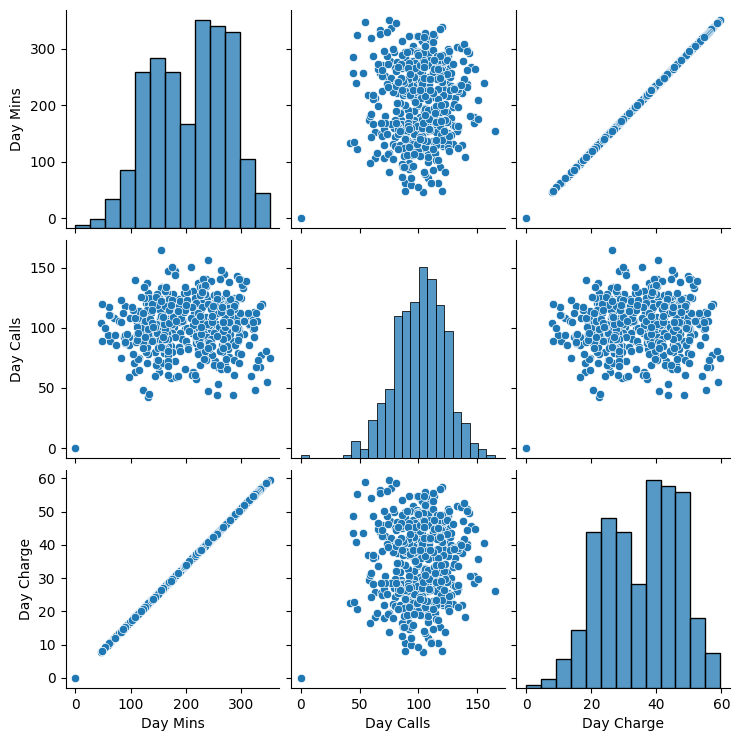

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Day Mins', 'Day Calls', 'Day Charge']])
plt.show()

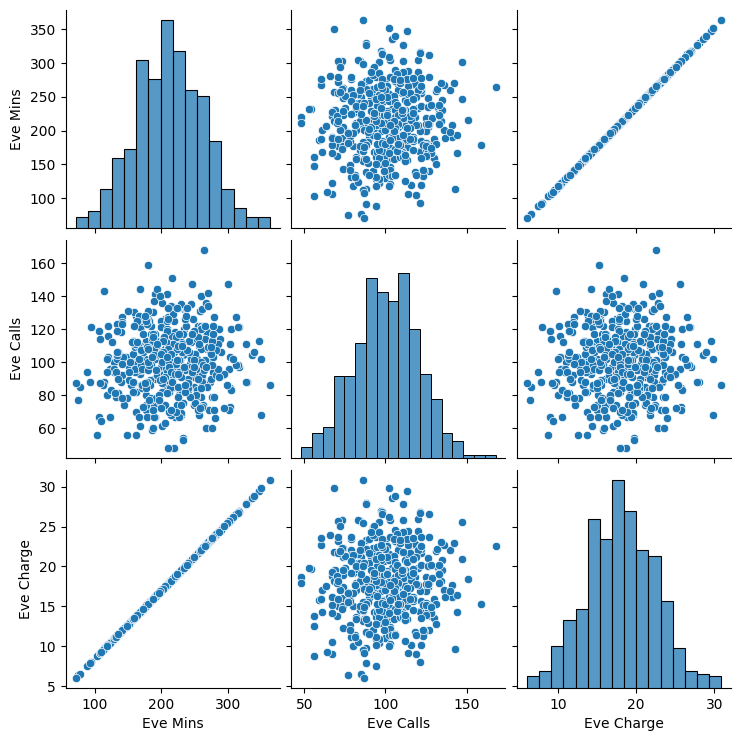

In [14]:
sns.pairplot(df[['Eve Mins', 'Eve Calls', 'Eve Charge']])
plt.show()

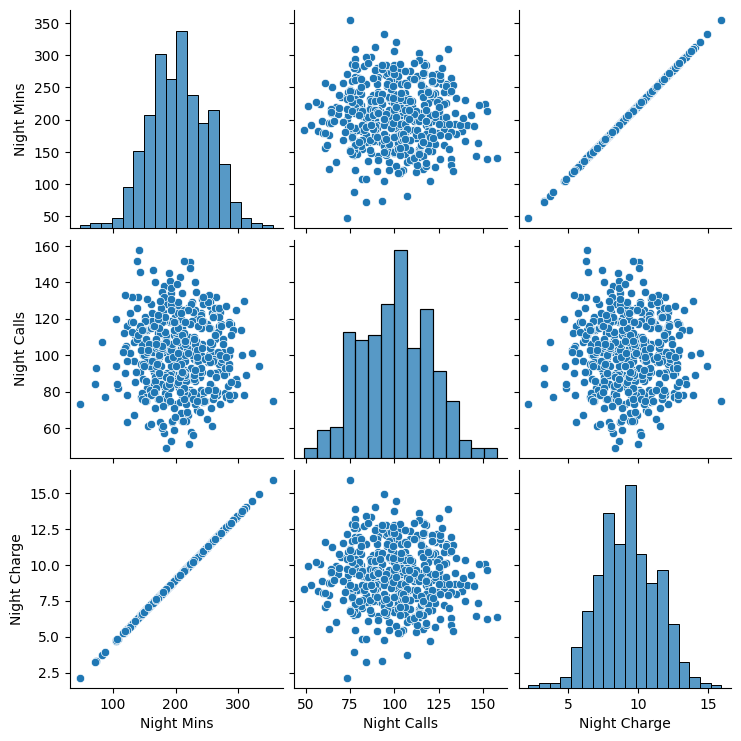

In [15]:
sns.pairplot(df[['Night Mins', 'Night Calls', 'Night Charge']])
plt.show()

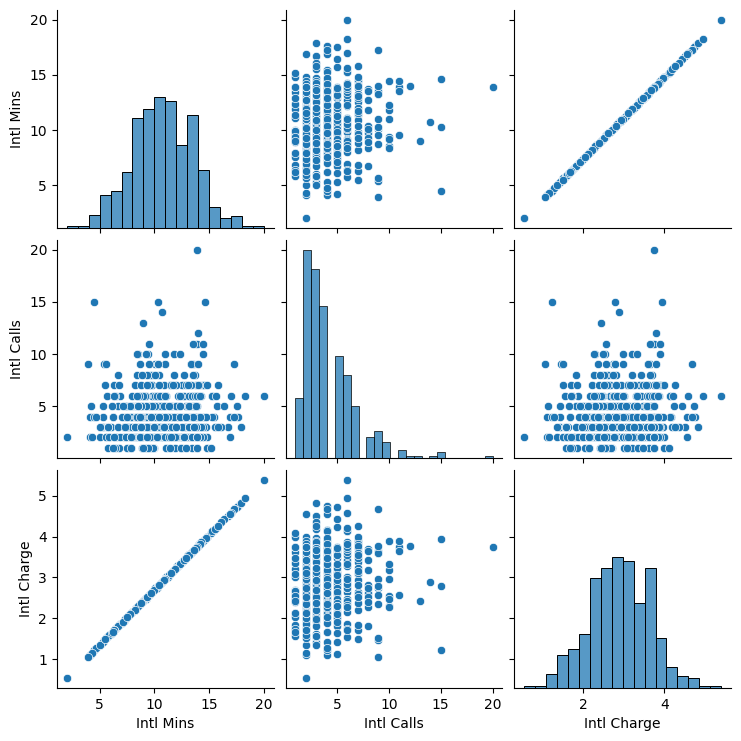

In [16]:
sns.pairplot(df[['Intl Mins', 'Intl Calls', 'Intl Charge']])
plt.show()

- Therefore, I will drop all the Charge columns because they are dependent to Mins columns

In [17]:
df = df.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
10,IN,65,415,no,no,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True.
15,NY,161,415,no,no,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True.
21,CO,77,408,no,no,0,62.4,89,169.9,121,209.6,64,5.7,6,5,True.
33,AZ,12,408,no,no,0,249.6,118,252.4,119,280.2,90,11.8,3,1,True.
41,MD,135,408,yes,yes,41,173.1,85,203.9,107,122.2,78,14.6,15,0,True.


- Mining the frequent attributes. First, I need to write the dataframe to a file in transactional format.

In [18]:
def write_churn_data(path, data):
    with open(path, 'wt') as f:
        headers = []
        for col in data.columns:
            words = col.split()
            s = ''.join(word for word in words)
            headers.append(s)
        lines = []
        for row in data.values:
            lines.append(row)
        for line in lines:
            s = ''
            for i in range(len(headers) - 1):
                s += f'{headers[i]}={line[i]} '
            s += f'{headers[len(headers) - 1]}={line[len(headers) - 1]}\n'
            f.write(s)

In [19]:
write_churn_data('trans_churn.txt', df)

- Read data from new churn dataset

In [20]:
def readChurnData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1;
        for line in f:
            itemset=set(map(str,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

- Mining

In [21]:
data, s= readChurnData('trans_churn.txt')
a = TP(data=data, s=s, minSup=200)
a.miningResults()

{1: [(['AreaCode=415'], 236),
  (["Int'lPlan=no"], 346),
  (['VMailMessage=0'], 403),
  (['VMailPlan=no'], 403),
  (['Churn?=True.'], 483)],
 2: [(['AreaCode=415', 'VMailMessage=0'], 202),
  (['AreaCode=415', 'VMailPlan=no'], 202),
  (['AreaCode=415', 'Churn?=True.'], 236),
  (["Int'lPlan=no", 'VMailMessage=0'], 302),
  (["Int'lPlan=no", 'VMailPlan=no'], 302),
  (['Churn?=True.', "Int'lPlan=no"], 346),
  (['VMailMessage=0', 'VMailPlan=no'], 403),
  (['Churn?=True.', 'VMailMessage=0'], 403),
  (['Churn?=True.', 'VMailPlan=no'], 403)],
 3: [(['AreaCode=415', 'VMailMessage=0', 'VMailPlan=no'], 202),
  (['AreaCode=415', 'Churn?=True.', 'VMailMessage=0'], 202),
  (['AreaCode=415', 'Churn?=True.', 'VMailPlan=no'], 202),
  (["Int'lPlan=no", 'VMailMessage=0', 'VMailPlan=no'], 302),
  (['Churn?=True.', "Int'lPlan=no", 'VMailMessage=0'], 302),
  (['Churn?=True.', "Int'lPlan=no", 'VMailPlan=no'], 302),
  (['Churn?=True.', 'VMailMessage=0', 'VMailPlan=no'], 403)],
 4: [(['AreaCode=415', 'Churn?=Tr

- Print results

In [22]:
write_data(churn_output_path, a.miningResults().items())

Now, I would like to mine the dataset of customers who are not churned. Apply the same above process.

In [23]:
not_churn_output_path = os.path.join(output_folder, 'not_churn.txt')
df = pd.read_csv('churn.txt')
df = df[df['Churn?'] == 'False.']
df = df.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])
write_churn_data('trans_not_churn.txt', df)
data, s= readChurnData('trans_not_churn.txt')
a = TP(data=data, s=s, minSup=1600)
a.miningResults()
write_data(not_churn_output_path, a.miningResults().items())

# 4 References

Feel free to send questions to my email address: nnduc@fit.hcmus.edu.vn
